In [ ]:
import numpy  as np
import pandas as pd
import math

import matplotlib.pyplot as plt

In [ ]:
# Read data from gdrive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Task 1
data = pd.read_csv( '/content/drive/My Drive/data/data.csv', delimiter=',' )

In [ ]:
# Task 2
print( data.describe() )

                Id  ...  NumberOfDependents
count  1350.000000  ...         1307.000000
mean    675.500000  ...            0.737567
std     389.855743  ...            1.086949
min       1.000000  ...            0.000000
25%     338.250000  ...            0.000000
50%     675.500000  ...            0.000000
75%    1012.750000  ...            1.000000
max    1350.000000  ...            8.000000

[8 rows x 12 columns]


In [ ]:
# Task 3
print( data.head() )

   Id  ...  NumberOfDependents
0   1  ...                 2.0
1   2  ...                 1.0
2   3  ...                 0.0
3   4  ...                 0.0
4   5  ...                 0.0

[5 rows x 12 columns]


In [ ]:
print( data.tail() )

        Id  ...  NumberOfDependents
1345  1346  ...                 0.0
1346  1347  ...                 1.0
1347  1348  ...                 1.0
1348  1349  ...                 2.0
1349  1350  ...                 0.0

[5 rows x 12 columns]


In [ ]:
# Task 6
data.rename( columns = { 'DebtRatio' : 'Debt' }, inplace = True )

In [ ]:
# Task 5
data.loc[data['MonthlyIncome'].notnull(), "Debt"] = data.loc[data['MonthlyIncome'].notnull(), "Debt"] * data.loc[data['MonthlyIncome'].notnull(), "MonthlyIncome"]
print(data[["Debt", "Id"]])

             Debt    Id
0     7323.197016     1
1      316.878123     2
2      258.914887     3
3      118.963951     4
4     1584.975094     5
...           ...   ...
1345   232.944085  1346
1346  1200.699824  1347
1347  3230.676930  1348
1348  2407.712069  1349
1349  1463.000000  1350

[1350 rows x 2 columns]


In [ ]:
# Task 7
mean = data.loc[data['MonthlyIncome'].notnull(), "MonthlyIncome"].mean()
data.loc[data['MonthlyIncome'].isnull(), "MonthlyIncome"] = mean

In [ ]:
# Task 8
print(data['SeriousDlqin2yrs'].groupby(data['NumberOfDependents']).mean())
print('--------------------------------')
print(data['SeriousDlqin2yrs'].groupby(data['NumberRealEstateLoansOrLines']).mean())

NumberOfDependents
0.0    0.041397
1.0    0.089844
2.0    0.110465
3.0    0.057143
4.0    0.033333
5.0    0.000000
6.0    0.000000
8.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64
--------------------------------
NumberRealEstateLoansOrLines
0    0.056863
1    0.048729
2    0.063158
3    0.145455
4    0.105263
5    0.000000
6    1.000000
8    0.000000
Name: SeriousDlqin2yrs, dtype: float64


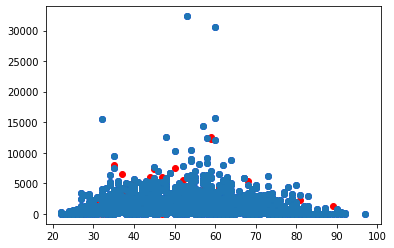

In [ ]:
fig, ax = plt.subplots()

zeroDebts = data.loc[data["SeriousDlqin2yrs"] == 0]
zeroDebts = zeroDebts.loc[zeroDebts["MonthlyIncome"] != mean]

moreThanZeroDebts = data.loc[data["SeriousDlqin2yrs"] > 0]
moreThanZeroDebts = moreThanZeroDebts.loc[moreThanZeroDebts["MonthlyIncome"] != mean]

ax.scatter(zeroDebts['age'], zeroDebts["Debt"], c="blue")
ax.scatter(moreThanZeroDebts['age'], moreThanZeroDebts["Debt"], c="red")
plt.scatter(zeroDebts['age'], zeroDebts['Debt'])
plt.show()

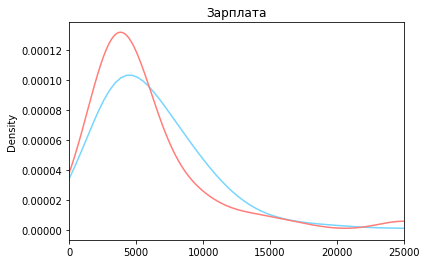

In [ ]:
fig, ax = plt.subplots()
plt.xlim([0, 25000])
plt.title('Зарплата')
zeroDebts['MonthlyIncome'].plot.kde(ax=ax, label="Без серьезных задолжностей", color="#76D6FF")
moreThanZeroDebts['MonthlyIncome'].plot.kde(ax=ax, label="С серьезными задолжностями", color="#FF7E79")
plt.show()

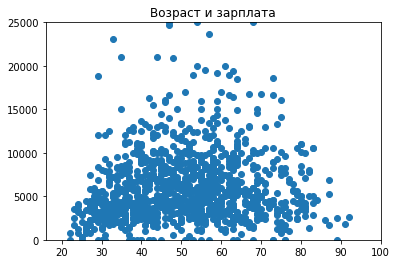

In [ ]:
incomeNoMoreThan25K = data.loc[data["MonthlyIncome"] <= 25000]
incomeNoMoreThan25K = data.loc[data["MonthlyIncome"] != mean]


plt.title("Возраст и зарплата")

plt.xlim([16, 100])
plt.ylim([0, 25000])
plt.plot(incomeNoMoreThan25K['age'],incomeNoMoreThan25K['MonthlyIncome'], 'o')
plt.show()

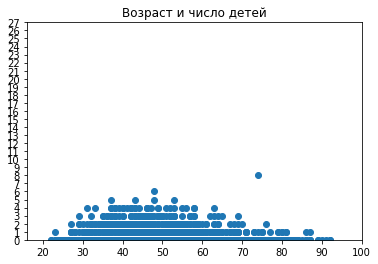

In [ ]:
plt.title("Возраст и число детей")

plt.xlim([16, 100])
plt.ylim([0, 20])
yint = range(int(incomeNoMoreThan25K['NumberOfDependents'].min()), int(incomeNoMoreThan25K['NumberOfDependents'].max())+20)
plt.yticks(yint)
plt.plot(incomeNoMoreThan25K['age'],incomeNoMoreThan25K['NumberOfDependents'], 'o')
plt.show()

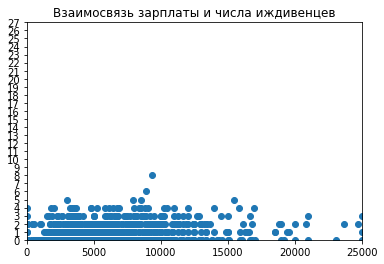

In [ ]:
plt.title("Взаимосвязь зарплат и числа детей")

plt.xlim([0, 25000])
plt.ylim([0, 20])
yint = range(int(incomeNoMoreThan25K['NumberOfDependents'].min()), int(incomeNoMoreThan25K['NumberOfDependents'].max())+20)
plt.yticks(yint)
plt.plot(incomeNoMoreThan25K['MonthlyIncome'],incomeNoMoreThan25K['NumberOfDependents'], 'o')
plt.show()
